tf.Tensor([[0.5]], shape=(1, 1), dtype=float32)


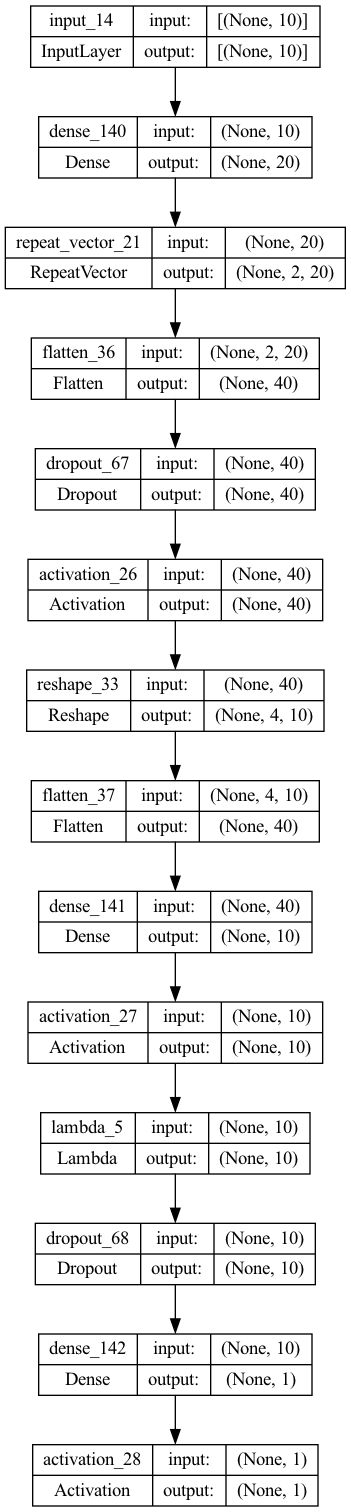

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model


class Sin(layers.Layer):
    def call(self, x):
        return keras.backend.sin(x)


class Max(layers.Layer):
    def call(self, x):
        return keras.backend.max(x)


initializer = tf.keras.initializers.Identity()
model = keras.Sequential(
    [
        layers.InputLayer(10),
        layers.Dense(20, kernel_initializer=initializer),
        layers.RepeatVector(2),
        layers.Flatten(),
        layers.Dropout(0, 2),
        layers.Activation('relu'),
        layers.Reshape(target_shape=(4, 10)),
        layers.Flatten(),
        layers.Dense(10, kernel_initializer=initializer),
        layers.Activation('relu'),
        layers.Lambda(lambda x: keras.backend.sin(x)),
        layers.Dropout(0.1),
        layers.Dense(1, kernel_initializer=initializer),
        layers.Activation('sigmoid')
    ]
)

data = np.arange(10).reshape((1,-1))
x_tf = tf.convert_to_tensor(data, np.float32)
y = model(x_tf)
print(y)
plot_model(model, to_file='model_plot_answer.png', show_shapes=True, show_layer_names=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 64)                50240     
                                                                 
 hidden2 (Dense)             (None, 64)                4160      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


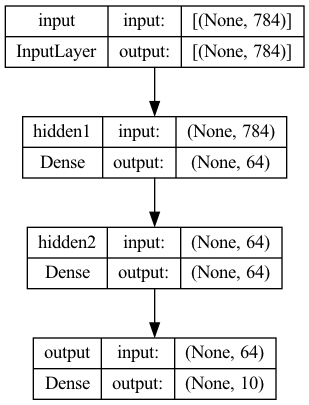

In [46]:

from keras.models import Model
from keras.layers import Input, Dense

input = Input(shape=(784,), name='input')
hidden1 = Dense(64, activation='relu', name='hidden1')(input)
hidden2 = Dense(64, activation='relu', name='hidden2')(hidden1)
output = Dense(10, activation='softmax', name='output')(hidden2)

model = Model(input, output)
model.summary()
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)